# US CRIME - Effect of Punishment Regimes on Crime Rates

Author: **Artur Chiaperini Grover**   
**Company**'s entrance exam      

-------   

In this exercise, I will create a regression model in order to find out what is the crime rate, denoted by variable `Crime`, for the following point (where variables assume the values):
- `M = 14.0`
- `So = 0`
- `Ed = 10.0`
- `Po1 = 12.0`
- `Po2 = 15.5`
- `LF = 0.640`
- `M.F = 94`
- `Pop = 150`
- `NW = 1.1`
- `U1 = 0.120`
- `U2 = 3.6`
- `Wealth = 3200`
- `Ineq = 20.1`
- `Prop = 0.04`
- `Time = 39.0` 
- `Crime = ???` 

-------    

# Data Description

The dataset can be found in [here](http://www.statsci.org/data/general/uscrime.html), and the information below was extracted from it.

>In order to investigate the effect of punishment regimes on crime rates, criminologists used the aggregated data of 47 states of the USA for 1960. The variables considered in this study are the following:   
>
>| Variable | Description |
>|:---------|:------------|
>| M		| percentage of males aged 14–24 in total state population |
>| So	    | indicator variable for a southern state |
>| Ed	    | mean years of schooling of the population aged 25 years or over |
>| Po1	    | per capita expenditure on police protection in 1960 |
>| Po2	    | per capita expenditure on police protection in 1959 |
>| LF	    | labour force participation rate of civilian urban males in the age-group 14-24 |
>| M.F	    | number of males per 100 females |
>| Pop	    | state population in 1960 in hundred thousands |
>| NW	    | percentage of nonwhites in the population |
>| U1       | unemployment rate of urban males 14–24 |
>| U2	    | unemployment rate of urban males 35–39 |
>| Wealth   | wealth: median value of transferable assets or family income |
>| Ineq	    | income inequality: percentage of families earning below half the median income |
>| Prob	    | probability of imprisonment: ratio of number of commitments to number of offenses |
>| Time	    | average time in months served by offenders in state prisons before their first release |
>| Crime	| crime rate: number of offenses per 100,000 population in 1960 |   

--------
# Data Exploration

Our goal is to model the experiment based on the dataset in order to determine the crime rate for the variables values given above. We can see the `Crime` (crime rate) as a function of the other variables, for instance:
$$
\begin{equation}
    f(\mathbf{X}) = \mathbf{A} * \mathbf{X} + C, 
\end{equation}
$$
where $f(\mathbf{X}) = Y = $ `Crime`, $\mathbf{X} = $ `(M, So, Ed, Po1, Po2, LF, M.F, Pop, NW, U1, U2, Wealth, Ineq, Prob, Time)`, $\mathbf{A}$ are the parameters of the model, and $C$ is a constant. At this point this is just one idea to illustrate the the problem, as a linear case, which in the future may turn out to be not the reality.  

Below we load the dataset and assign it to a pandas DataFrame object `df_crimes`, this allow us to have an initial look at our dataset.

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_crimes = pd.read_csv("../dataset/uscrime.txt", sep="\t")

In [3]:
df_crimes.head(5)

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
0,15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
1,14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
2,14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
3,13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
4,14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234


In [4]:
df_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       47 non-null     float64
 1   So      47 non-null     int64  
 2   Ed      47 non-null     float64
 3   Po1     47 non-null     float64
 4   Po2     47 non-null     float64
 5   LF      47 non-null     float64
 6   M.F     47 non-null     float64
 7   Pop     47 non-null     int64  
 8   NW      47 non-null     float64
 9   U1      47 non-null     float64
 10  U2      47 non-null     float64
 11  Wealth  47 non-null     int64  
 12  Ineq    47 non-null     float64
 13  Prob    47 non-null     float64
 14  Time    47 non-null     float64
 15  Crime   47 non-null     int64  
dtypes: float64(12), int64(4)
memory usage: 5.9 KB


Our data has no missing values, this information is shown by `df_crimes.info()` method. We can also see that most of the variables are numerical. However, according to the data description, `So` is an indicator variable which I believe is more reasonable to be used as a categorical variable, this will be addressed later.

So from our data, we can see that it has dimension 47 X 15. There are 47 points (`Crime`), and each one of theses points have 15 variables. 

In [5]:
df_crimes.describe()

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
count,47.000000,47.000000,47.00000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,13.857447,0.340426,10.56383,8.500000,8.023404,0.561191,98.302128,36.617021,10.112766,0.095468,3.397872,5253.829787,19.400000,0.047091,26.597921,905.085106
std,1.256763,0.478975,1.11870,2.971897,2.796132,0.040412,2.946737,38.071188,10.282882,0.018029,0.844545,964.909442,3.989606,0.022737,7.086895,386.762697
min,11.900000,0.000000,8.70000,4.500000,4.100000,0.480000,93.400000,3.000000,0.200000,0.070000,2.000000,2880.000000,12.600000,0.006900,12.199600,342.000000
25%,13.000000,0.000000,9.75000,6.250000,5.850000,0.530500,96.450000,10.000000,2.400000,0.080500,2.750000,4595.000000,16.550000,0.032701,21.600350,658.500000
50%,13.600000,0.000000,10.80000,7.800000,7.300000,0.560000,97.700000,25.000000,7.600000,0.092000,3.400000,5370.000000,17.600000,0.042100,25.800600,831.000000
75%,14.600000,1.000000,11.45000,10.450000,9.700000,0.593000,99.200000,41.500000,13.250000,0.104000,3.850000,5915.000000,22.750000,0.054450,30.450750,1057.500000
max,17.700000,1.000000,12.20000,16.600000,15.700000,0.641000,107.100000,168.000000,42.300000,0.142000,5.800000,6890.000000,27.600000,0.119804,44.000400,1993.000000


Then, another useful method of `df_crimes` object is `.describe()` which summarises the variables and we can start to see the minimum and maximum of the dataset, as well as the mean values of each varible.  

We can see that the total count holds for every variable as was shown by `.info()` method, and we also see that all of the variables are positive. Given the kind of study these variables relate to, the fact that all of them are positive is rather expected. These variables, according to the description, are porcentages, counts, and averages of positive or null numbers, thus we would not expect to find a negative number.   

In this problem we can initially think that we have 15 independent variables `(M, So, Ed, Po1, Po2, LF, M.F, Pop, NW, U1, U2, Wealth, Ineq, Prob, Time)`, and then a dependent variable `Crime`.

The heatmap is a good visualization to look for correlation between variables and with the dependent variable. In case we have high correlation between variables, we can think of applying some kind of dimensionality reduction, or even eliminating one of the variables if the correlation is too strong.

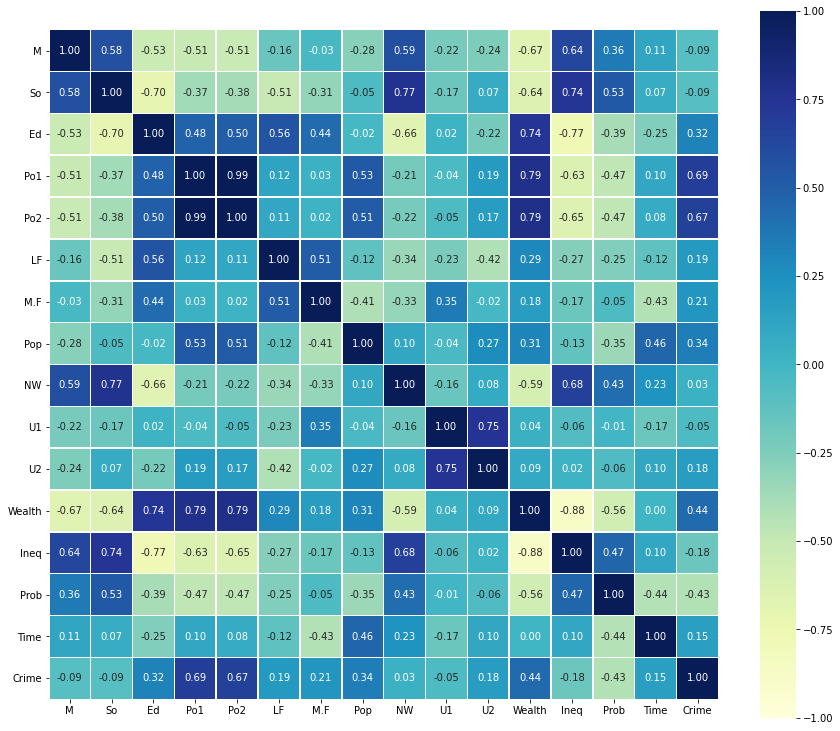

In [6]:
fig, ax = plt.subplots(figsize=(15,13))

corr_crimes = df_crimes.corr()

sns.heatmap(corr_crimes, vmin=-1.0, vmax=1.0, center=0.0, fmt='.2f',
                square=True, linewidths=0.5, annot=True, cmap='YlGnBu')

plt.yticks(rotation=0)
plt.show()

The heatmap above shows the pearson correlation between variables, which varies from -1.0 (negative correlation) to 1.0 (positive correlation):
- Negative Correlation: variables behave in the opposite direction, while variable A is increasing, variable B is decreasing.
- Positive Correlation: both variables A and B behave in the same direction, such that when A increases, B increases as well.
- No Correlation (values close to 0.0): there is no relationship between the variables A and B.   

We can see that some variables have a strong positive correlation between each other, below is an enumeration of set of variables that present some significant correlation value:
- `Po1` and `Po2` have positive correlation of 0.99.
- `Wealth` and `Ed`, `Wealth` and `Po1`, `Wealth` and `Po2` have positive correlations, respectively, 0.74, 0.79, 0.79.
- `NW` and `So` have a correlation of 0.77.
- `Ineq` and `Ed` have a negative correlation of -0.77.
- `Wealth` and `Ineq` have a negative correlation of -0.88.
- `U1` and `U2` have a positive correlation of 0.75.



At this point the idea is not to explain why these behaviours happen, but to point out what we can see from the data. Nevertheless, `Po1` and `Po2` high correlation is due to the fact that the values of both columns are pretty much the same. This aspect is shown on the Figure below, where the linear relationship between `Po1` and `Po2` is rather clear. Because of the linear relation between theses two variables, we will continue the analysis considering only `Po1`. Another reason to keep only `Po1` instead of `Po2` is that `Po1` correlation with `Crime` is greater than the correlation of `Po2` and `Crime`.

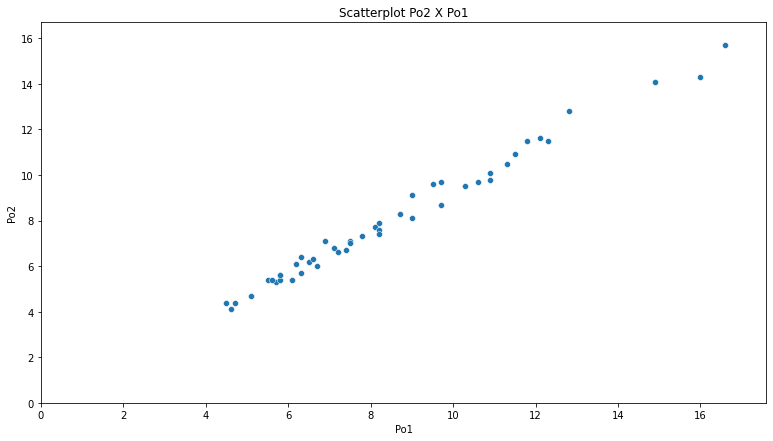

In [7]:
xmax = df_crimes['Po1'].max() + 1
ymax = df_crimes['Po2'].max() + 1

fig = plt.figure(figsize=(13,7))
gs = mpl.gridspec.GridSpec(1,1, figure=fig)

ax0 = fig.add_subplot(gs[0,0])
ax0 = sns.scatterplot(x='Po1', y='Po2', data=df_crimes)
ax0.set_xlim((0, xmax))
ax0.set_ylim((0, ymax))
ax0.set_title("Scatterplot Po2 X Po1")

plt.show()

In the following Figure, we will look at the relationship of `Wealth` and the variables `Ed`, `Po1`, `Ineq` and `M`. 

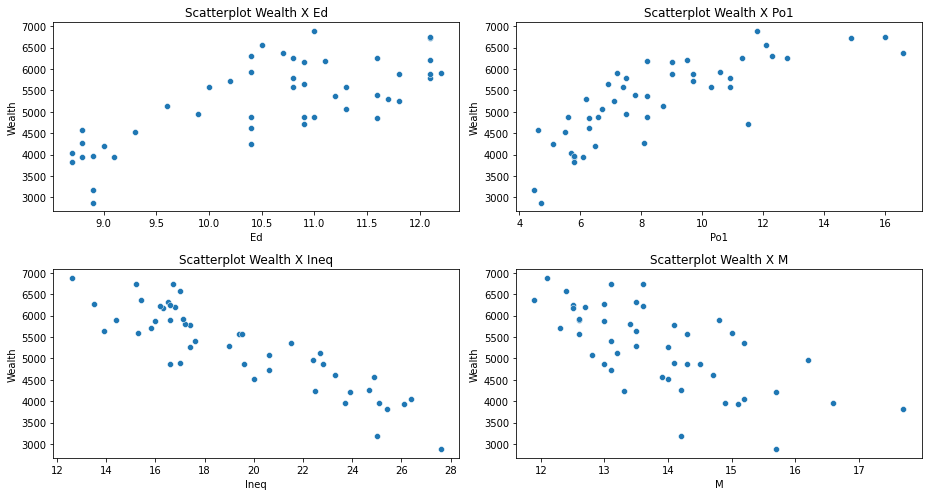

In [8]:
fig = plt.figure(figsize=(13,7))
gs = mpl.gridspec.GridSpec(2,2, figure=fig)

ax0 = fig.add_subplot(gs[0,0])
ax0 = sns.scatterplot(x='Ed', y='Wealth', data=df_crimes)
ax0.set_title("Scatterplot Wealth X Ed")

ax1 = fig.add_subplot(gs[0,1])
ax1 = sns.scatterplot(x='Po1', y='Wealth', data=df_crimes)
ax1.set_title("Scatterplot Wealth X Po1")

ax2 = fig.add_subplot(gs[1,0])
ax2 = sns.scatterplot(x='Ineq', y='Wealth', data=df_crimes)
ax2.set_title("Scatterplot Wealth X Ineq")

ax3 = fig.add_subplot(gs[1,1])
ax3 = sns.scatterplot(x='M', y='Wealth', data=df_crimes)
ax3.set_title("Scatterplot Wealth X M")

plt.tight_layout()
plt.show()

The top graphs show that `Wealth` increase as `Ed` and `Po1` increase, while `Wealth` decreases as `Ineq` and `M` increase. Theses trends are very subtle in all four cases, but it matches exactly what we got from the correlation map. 

So far we have been looking at the independent variables. We can also have a look at the distribution of crime rates.

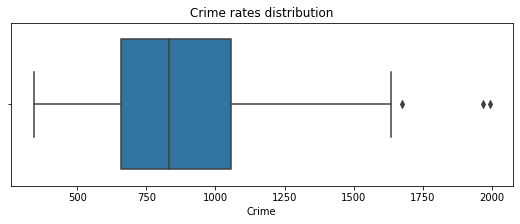

In [71]:
fig, axes = plt.subplots(figsize=(9,3))

axes = sns.boxplot(x='Crime', data=df_crimes)

plt.title("Crime rates distribution")
plt.show()

-------
# Data Modeling

Now at this step we will be testing a few modeling options before making a decision.

To tackle this problem we are going to make use of [scikit-learn](https://scikit-learn.org/stable/index.html) module.

From the analysis done on data exploration, we will no longer take into consideration the variable `Po2`.

In [9]:
df_crimes.drop('Po2', axis=1, inplace=True)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, ElasticNet

### Multivariate Linear Regression

As an initial trial we can think about the relationship between `Crime` and the other variables as a linear relationship.

In statistic modeling, whenever we have variables that are in different scale, we transform them to standard score units, also known as z-score. This transformation changes the scale of the variables, so that for each point of each variable the value is dimensionless. By doing so, we avoid scaling and magnitude differences, for instance, if we take `Wealth` and `U1`, `Wealth` maximum is 6890, while `U1` maximum is 0.142, there is a huge magnitude difference, and it can wrongly biases the model in a way it may give `Wealth` more importance than `U1`.

In this exercise we will apply standard scale to the variables using the method `StandardScaler` of `scikit-learn`.

Below, `to_predict` holds the information of the point we would like to predict the crime rate.

In [11]:
to_predict = pd.DataFrame(np.array([[14.0, 0, 10.0, 12, 0.640, 94, 150, 1.1, 0.120, 3.6, 3200, 20.1, 0.04, 39]]), 
                          columns=df_crimes.drop('Crime', axis=1).columns.values)
to_predict

,M,So,Ed,Po1,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time
0,14.0,0.0,10.0,12.0,0.64,94.0,150.0,1.1,0.12,3.6,3200.0,20.1,0.04,39.0


In [12]:
results = {}

With `scikit-learn` it is possible to run a set of process using a `Pipeline`, this automizes the transformation with `StandardScaler` and the linear regression.

In [13]:
numerical_var = [col for col in df_crimes.columns if (col != 'Crime') and (col != 'So')]
categorical_var = ['So']

numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [14]:
preprocessor = ColumnTransformer(
                    transformers=[
                        ('num', numerical_transformer, numerical_var)])

We also have to separete the dependent variable from the independent variables, we assign the features that will be used in the regression to `X` and the crime rates, `Crime`, to `y`.

In [15]:
X = df_crimes.drop('Crime', axis=1)
y = df_crimes['Crime']

In [16]:
X.head(3)

,M,So,Ed,Po1,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time
0,15.1,1,9.1,5.8,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011
1,14.3,0,11.3,10.3,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999
2,14.2,1,8.9,4.5,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006


In [17]:
y.head(3)

0     791
1    1635
2     578
Name: Crime, dtype: int64

Before running the linear regression, we can split the dataset into a training set and a testing set. Whatever data is used on the training set is not part of the testing set and vice-versa. Then we use the training set to model the regression and the testing set to evaluate how good our model is. 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

`full_linreg` is the whole processing flow. After we have fit the model to the data, we can check out the `score` which is the coefficient of determination, also known as r-squared. This value measures how accurate the modeling is, if r-squared is 1, then there is a perfect prediction.

In [19]:
full_linreg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression', LinearRegression(normalize=False))])

In [20]:
full_linreg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['M', 'Ed', 'Po1', 'LF',
                                                   'M.F', 'Pop', 'NW', 'U1',
                                                   'U2', 'Wealth', 'Ineq',
                                                   'Prob', 'Time'])])),
                ('regression', LinearRegression())])

In [21]:
print(full_linreg.score(X_train, y_train))
print(full_linreg.score(X_test, y_test))

0.6851501882191149
0.7778052030498175


To keep track of tests and mdeling, I have saved some results in a dictionary called `results`.

In [22]:
results['full_linreg'] = {'train_score': full_linreg.score(X_train, y_train),
                          'test_score': full_linreg.score(X_test, y_test)}

In [23]:
crime = full_linreg.predict(to_predict)

In [24]:
results['full_linreg']['predicted'] = crime[0]

Considering all variables, with exception of `Po2`, the linear regression modeled managed to predict for the point provided the crime rate of:

In [25]:
print("Crime rate = {}".format(results['full_linreg']['predicted']))

Crime rate = 1056.2779738661209


We can test other approaches, for instance, we take only the variables that had a correlation coeffient within the following ranges:
- 0.3 to 0.7. 
- -0.7 to -0.3.

By doing so we would not exclude variables that have a negative correlation with `Crime`. And then we try to keep only variables that seems to be more relevant to describe the phenomenon of crime rates.

In [26]:
corr_value = df_crimes.corr()['Crime']
print(corr_value)

M        -0.089472
So       -0.090637
Ed        0.322835
Po1       0.687604
LF        0.188866
M.F       0.213914
Pop       0.337474
NW        0.032599
U1       -0.050478
U2        0.177321
Wealth    0.441320
Ineq     -0.179024
Prob     -0.427422
Time      0.149866
Crime     1.000000
Name: Crime, dtype: float64


In [27]:
conditional = (corr_value > -0.7) & (corr_value < -0.3) | (corr_value > 0.3) & (corr_value < 0.7)

In [28]:
X_2 = X[df_crimes.loc[:, conditional].columns.values]

In [29]:
X_2.head(5)

,Ed,Po1,Pop,Wealth,Prob
0,9.1,5.8,33,3940,0.084602
1,11.3,10.3,13,5570,0.029599
2,8.9,4.5,18,3180,0.083401
3,12.1,14.9,157,6730,0.015801
4,12.1,10.9,18,5780,0.041399


In [30]:
preprocessor = ColumnTransformer(
                    transformers=[
                        ('num', numerical_transformer, X_2.columns.values)])

In [31]:
corr_linreg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression', LinearRegression(normalize=False))])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.3, random_state=42, shuffle=True)

In [33]:
corr_linreg.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  array(['Ed', 'Po1', 'Pop', 'Wealth', 'Prob'], dtype=object))])),
                ('regression', LinearRegression())])

In [34]:
train_score = corr_linreg.score(X_train, y_train)
test_score = corr_linreg.score(X_test, y_test)

In [35]:
crime = corr_linreg.predict(to_predict[X_2.columns])

In [36]:
results['corr_linreg'] = {'train_score': train_score,
                          'test_score': test_score,
                          'predicted': crime[0]}

In [37]:
pd.DataFrame(results)

,full_linreg,corr_linreg
train_score,0.685150,0.412042
test_score,0.777805,0.509093
predicted,1056.277974,1370.027254


From the table above, we can see that considering only variables with correlation coefficients with the purposed ranges did not improved the final result compared to using all variables.

Still using the idea of limiting variables by the correlation values, we can increase a little bit the ranges, but keeping outside the variables that had values closer to zero.

In [38]:
conditional = (corr_value > -0.7) & (corr_value < -0.1) | (corr_value > 0.1) & (corr_value < 0.7)

X_3 = X[df_crimes.loc[:, conditional].columns.values]

X_3.head(5)

,Ed,Po1,LF,M.F,Pop,U2,Wealth,Ineq,Prob,Time
0,9.1,5.8,0.510,95.0,33,4.1,3940,26.1,0.084602,26.2011
1,11.3,10.3,0.583,101.2,13,3.6,5570,19.4,0.029599,25.2999
2,8.9,4.5,0.533,96.9,18,3.3,3180,25.0,0.083401,24.3006
3,12.1,14.9,0.577,99.4,157,3.9,6730,16.7,0.015801,29.9012
4,12.1,10.9,0.591,98.5,18,2.0,5780,17.4,0.041399,21.2998


In [39]:
preprocessor = ColumnTransformer(
                    transformers=[
                        ('num', numerical_transformer, X_3.columns.values)])

corr2_linreg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearRegression(normalize=False))])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_3, y, test_size=0.3, random_state=42, shuffle=True)

In [41]:
corr2_linreg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  array(['Ed', 'Po1', 'LF', 'M.F', 'Pop', 'U2', 'Wealth', 'Ineq', 'Prob',
       'Time'], dtype=object))])),
                ('classifier', LinearRegression())])

In [42]:
train_score = corr2_linreg.score(X_train, y_train)
test_score = corr2_linreg.score(X_test, y_test)
crime = corr2_linreg.predict(to_predict[X_3.columns])

In [43]:
results['corr2_linreg'] = {'train_score': train_score,
                          'test_score': test_score,
                          'predicted': crime[0]}

In [44]:
pd.DataFrame(results)

,full_linreg,corr_linreg,corr2_linreg
train_score,0.685150,0.412042,0.628451
test_score,0.777805,0.509093,0.714045
predicted,1056.277974,1370.027254,1079.278671


Compared with the first correlation selection approach, we did have some improvements with the second approach, where more variables were used, but still not a very good test score if we look at the results using all variables.

Now we can apply a different kind of linear regression, called `Elastic Net`, which uses both taxicab metric ($L_{1}$) and the euclidean norm ($L_{2}$) to minimize the differences.

In [45]:
preprocessor = ColumnTransformer(
                    transformers=[
                        ('num', numerical_transformer, X.columns.values)])

full_elastic = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression', ElasticNet())])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [47]:
full_elastic.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  array(['M', 'So', 'Ed', 'Po1', 'LF', 'M.F', 'Pop', 'NW', 'U1', 'U2',
       'Wealth', 'Ineq', 'Prob', 'Time'], dtype=object))])),
                ('regression', ElasticNet())])

In [48]:
train_score = full_elastic.score(X_train, y_train)
test_score = full_elastic.score(X_test, y_test)
crime = full_elastic.predict(to_predict[X.columns])

In [49]:
results['full_elastic'] = {'train_score': train_score,
                          'test_score': test_score,
                          'predicted': crime[0]}

In [50]:
pd.DataFrame(results)

,full_linreg,corr_linreg,corr2_linreg,full_elastic
train_score,0.685150,0.412042,0.628451,0.487981
test_score,0.777805,0.509093,0.714045,0.402837
predicted,1056.277974,1370.027254,1079.278671,894.004405


If we look at the variables description, we can use our infer about 

In [51]:
website_var = ['M', 'Ed', 'Po1', 'U2', 'Ineq', 'Prob']

X_4 = X[website_var]
X_4.head(3)

,M,Ed,Po1,U2,Ineq,Prob
0,15.1,9.1,5.8,4.1,26.1,0.084602
1,14.3,11.3,10.3,3.6,19.4,0.029599
2,14.2,8.9,4.5,3.3,25.0,0.083401


In [52]:
preprocessor = ColumnTransformer(
                    transformers=[
                        ('num', numerical_transformer, X_4.columns.values)])

web_linreg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearRegression(normalize=False))])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_4, y, test_size=0.3, random_state=42, shuffle=True)

In [54]:
web_linreg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  array(['M', 'Ed', 'Po1', 'U2', 'Ineq', 'Prob'], dtype=object))])),
                ('classifier', LinearRegression())])

In [55]:
train_score = web_linreg.score(X_train, y_train)
test_score = web_linreg.score(X_test, y_test)
crime = web_linreg.predict(to_predict[X_4.columns])

In [56]:
results['web_linreg'] = {'train_score': train_score,
                          'test_score': test_score,
                          'predicted': crime[0]}

In [57]:
pd.DataFrame(results)

,full_linreg,corr_linreg,corr2_linreg,full_elastic,web_linreg
train_score,0.685150,0.412042,0.628451,0.487981,0.610551
test_score,0.777805,0.509093,0.714045,0.402837,0.880846
predicted,1056.277974,1370.027254,1079.278671,894.004405,1267.121362
